In [1]:
import os

# Giving the path of the images

In [2]:
# Dictory with daisy pictures

healthy_dir = os.path.join('C:\\Users\\yaz19023\\Pythonoutput\\GearDataRaw\\1healthy')

# Dictory with dandelion pictures

missing_dir = os.path.join('C:\\Users\\yaz19023\\Pythonoutput\\GearDataRaw\\2missing')

# Dictory with rose pictures

crack_dir = os.path.join('C:\\Users\\yaz19023\\Pythonoutput\\GearDataRaw\\3crack')

# Dictory with sunflower pictures

spall_dir = os.path.join('C:\\Users\\yaz19023\\Pythonoutput\\GearDataRaw\\4spall')

# Dictory with tulip pictures

chip5a_dir = os.path.join('C:\\Users\\yaz19023\\Pythonoutput\\GearDataRaw\\5chip5a')
# Dictory with tulip pictures

chip4a_dir = os.path.join('C:\\Users\\yaz19023\\Pythonoutput\\GearDataRaw\\6chip4a')
# Dictory with tulip pictures

chip3a_dir = os.path.join('C:\\Users\\yaz19023\\Pythonoutput\\GearDataRaw\\7chip3a')
# Dictory with tulip pictures

chip2a_dir = os.path.join('C:\\Users\\yaz19023\\Pythonoutput\\GearDataRaw\\8chip2a')
# Dictory with tulip pictures

chip1a_dir = os.path.join('C:\\Users\\yaz19023\\Pythonoutput\\GearDataRaw\\9chip1a')

# Display some images

In [3]:
train_healthy_names = os.listdir(healthy_dir)
print(train_healthy_names[:5])

train_missing_names = os.listdir(missing_dir)
print(train_missing_names[:5])

['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg']
['105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg']


In [4]:
print('total healthy images:', len(os.listdir(healthy_dir)))
print('total missing images:', len(os.listdir(missing_dir)))
print('total crack images:', len(os.listdir(crack_dir)))
print('total spall images:', len(os.listdir(spall_dir)))
print('total chip5a images:', len(os.listdir(chip5a_dir)))
print('total chip4a images:', len(os.listdir(chip4a_dir)))
print('total chip3a images:', len(os.listdir(chip3a_dir)))
print('total chip2a images:', len(os.listdir(chip2a_dir)))
print('total chip1a images:', len(os.listdir(chip1a_dir)))

total healthy images: 104
total missing images: 104
total crack images: 104
total spall images: 104
total chip5a images: 104
total chip4a images: 104
total chip3a images: 104
total chip2a images: 104
total chip1a images: 104


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Showing some healthy pictures...



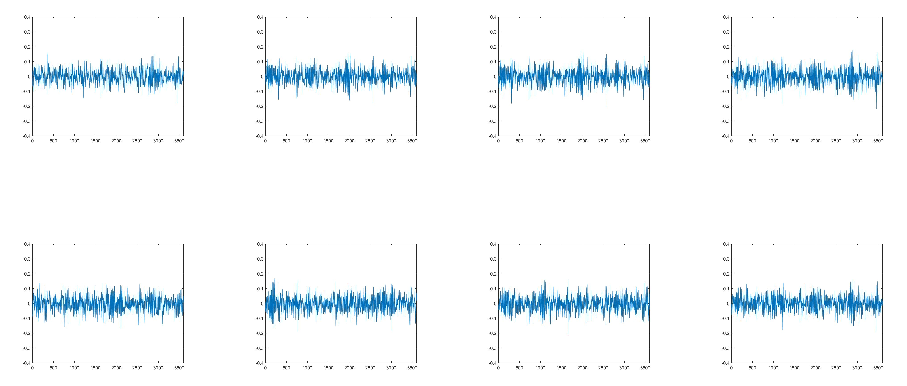

Showing some missing pictures...



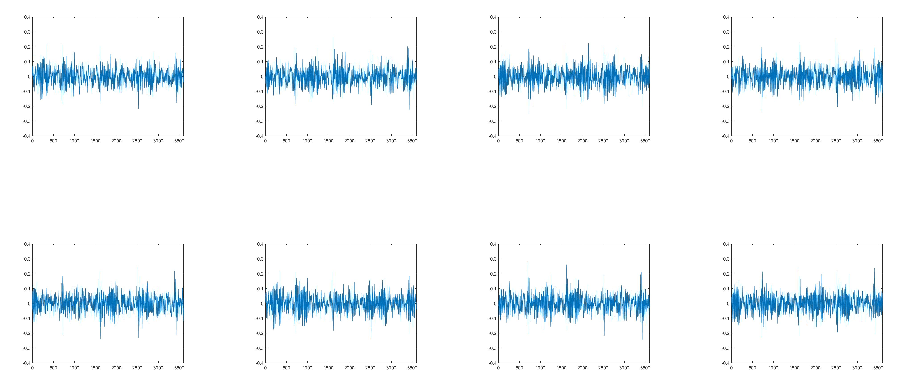

In [6]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_healthy_pix = [os.path.join(healthy_dir, fname) 
                for fname in train_healthy_names[pic_index-8:pic_index]]
next_missing_pix = [os.path.join(missing_dir, fname) 
                for fname in train_missing_names[pic_index-8:pic_index]]

print ("Showing some healthy pictures...")
print()
for i, img_path in enumerate(next_healthy_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

print ("Showing some missing pictures...")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_missing_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Label the images

In [7]:
batch_size = 36

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'C:\\Users\\yaz19023\\Pythonoutput\\GearDataRaw',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['1healthy','2missing','3crack','4spall','5chip5a','6chip4a','7chip3a','8chip2a','9chip1a'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 936 images belonging to 9 classes.


## Training starting

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(9, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [13]:
total_sample=train_generator.n

In [14]:
n_epochs = 10

In [15]:
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

Epoch 1/10
26/26 [==============================] - 73s 3s/step - loss: 2.1800 - acc: 0.1581
Epoch 2/10
26/26 [==============================] - 73s 3s/step - loss: 1.6524 - acc: 0.3793
Epoch 3/10
26/26 [==============================] - 73s 3s/step - loss: 1.2653 - acc: 0.5534
Epoch 4/10
26/26 [==============================] - 73s 3s/step - loss: 0.8546 - acc: 0.6325
Epoch 5/10
26/26 [==============================] - 73s 3s/step - loss: 0.5920 - acc: 0.7607
Epoch 6/10
26/26 [==============================] - 73s 3s/step - loss: 0.4026 - acc: 0.8611
Epoch 7/10
26/26 [==============================] - 73s 3s/step - loss: 0.2244 - acc: 0.9434
Epoch 8/10
26/26 [==============================] - 73s 3s/step - loss: 0.1181 - acc: 0.9786
Epoch 9/10
26/26 [==============================] - 73s 3s/step - loss: 0.1836 - acc: 0.9573
Epoch 10/10
26/26 [==============================] - 72s 3s/step - loss: 0.1418 - acc: 0.9562


## Show training results

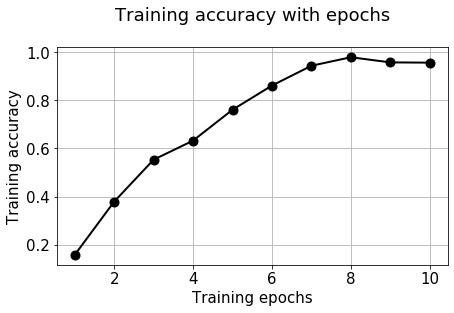

In [26]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

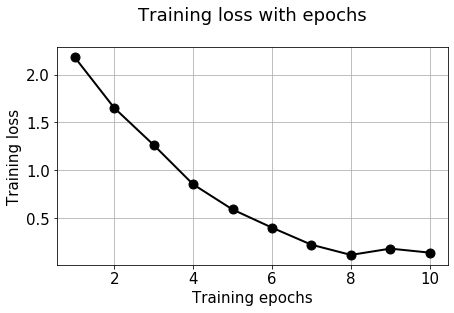

In [27]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()